In [12]:
import numpy as np
import pandas as pd
import os

from scipy import stats

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
orderdf = pd.read_csv('ignored_assets/orders.csv', parse_dates = [6,7])

In [14]:
od1 = orderdf[(orderdf['start_district_hash'] == '82cc4851f9e4faa4e54309f8bb73fd7c') & (orderdf['dest_district_hash'] == 'b05379ac3f9b7d99370d443cfd5dcc28')]

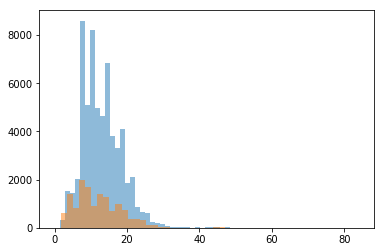

In [15]:
mask = ~pd.isnull(od1['driver_id'])
plt.hist(od1[mask]['price'], bins =50, alpha = 0.5);
plt.hist(od1[~mask]['price'], bins =50, alpha = 0.5);

In [16]:
len(od1['price'])

75855

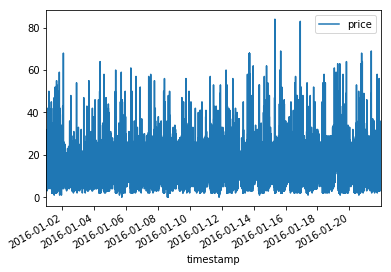

In [17]:
od1[['timestamp','price']].set_index('timestamp').plot();

In [18]:
mask = ~pd.isnull(od1['driver_id'])
plt.scatter(od1[mask]['hour'], od1[mask]['price'], alpha =0.5);
plt.scatter(od1[~mask]['hour'], od1[~mask]['price'], alpha = 0.5);

KeyError: 'hour'

In [248]:
p1 = od1[mask & (od1['hour'] == 0) ]['price']
p2 = od1[mask & (od1['hour'] == 3) ]['price']

In [249]:
stats.ks_2samp(p1, p2)

Ks_2sampResult(statistic=0.076897876897876888, pvalue=0.26254630666623813)

In [250]:
print len(p1), p1.mean()

1221 15.7444717445


In [251]:
print len(p2), p2.mean()

195 15.6512820513


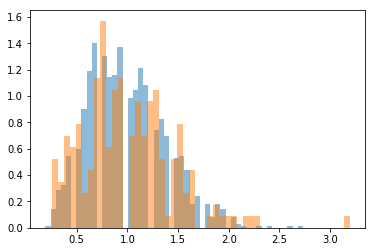

In [252]:
plt.hist(p1 / p1.mean(), bins =50, alpha = 0.5, normed = True);
plt.hist(p2 / p2.mean(), bins =50, alpha = 0.5, normed = True);

There is surge pricing.

In [253]:
pd.unique(p1)

array([  8.,  21.,  18.,   9.,  15.,  10.,  11.,  25.,   7.,  12.,  23.,
        16.,  19.,  13.,   5.,  14.,   6.,   4.,  17.,  22.,  30.,  28.,
        20.,  24.,  29.,   3.,  27.,  43.,  33.,  31.,  38.,  26.,  32.,
        41.,  36.,  34.])

In [254]:
pd.unique(p2)

array([  9.,  14.,   6.,  36.,  12.,  13.,  24.,  25.,  20.,  11.,  15.,
        23.,  50.,  10.,   7.,   5.,   4.,   8.,  19.,  28.,  16.,  21.,
        17.,  29.,  30.,  32.,  18.,  26.,  35.,  22.,  34.,  31.])